(..)

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import gensim
import collections
from afinn import Afinn
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [99]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tajimakeijiro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tajimakeijiro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [100]:
path_press_released = "../data/02_processed/FDA_press_released_2011_2019.csv"
path_enforced = "../data/02_processed/FDA_enforcements_2012-06_to_2019-10.csv"

In [101]:
df_press_released = pd.read_csv(path_press_released)
df_enforced = pd.read_csv(path_enforced, encoding = 'unicode_escape')

In [102]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english')) 

# stemmer = PorterStemmer()

def process_text(sentence):
    token_words = nltk.word_tokenize(sentence)
    no_stopwords = [word.lower() for word in token_words if word not in stop_words and not \
                    all(c in string.punctuation for c in word) and not len(word) < 2]
    # return [stemmer.stem(word) for word in no_stopwords]
    return [(word) for word in no_stopwords]

print(process_text('I ordered spongbob slippers and I got John'))

['ordered', 'spongbob', 'slippers', 'got', 'john']


In [103]:
stemmed_press_released = df_press_released.copy()
stemmed_press_released['stemmed_Reason'] = stemmed_press_released['Reason'].astype(str).apply(lambda x : process_text(x))
stemmed_enforced = df_enforced.copy()
stemmed_enforced['stemmed_Reason.for.Recall'] = stemmed_enforced['Reason.for.Recall'].astype(str).apply(lambda x : process_text(x))

In [104]:
stemmed_press_released.head()

,Unnamed: 0,Date,Brand,ProductDescription,Reason,Company,Url,stemmed_Reason
0,0,"Sat, 31 Dec 2011 22:37:00 -0500","Let&#39;s Grow Healthy Together!, Green Valley...",Sprouts,Listeria monocytogenes,Green Valley Food Corp.,http://wayback.archive-it.org/7993/20170406200...,"[listeria, monocytogenes]"
1,1,"Sat, 31 Dec 2011 00:00:00 -0500",Edelweiss Creamery,cheese,Listeria monocytogenes,Alpine Slicing and Cheese Conversion,http://wayback.archive-it.org/7993/20170406200...,"[listeria, monocytogenes]"
2,2,"Sat, 31 Dec 2011 00:00:00 -0500",Brennan&#39;s Cellars,Cheese,Listeria monocytogenes,Alpine Slicing and Cheese Conversion,http://wayback.archive-it.org/7993/20170406200...,"[listeria, monocytogenes]"
3,3,"Fri, 30 Dec 2011 00:00:00 -0500",Martinelli&#39;s Gold Medal,Sparkling Cider,Defective Seal,S. Martinelli &amp; Company,http://wayback.archive-it.org/7993/20170406200...,"[defective, seal]"
4,4,"Fri, 30 Dec 2011 00:00:00 -0500",Organique by Himalaya,Night Cream,staphylococcus aureus and fungus,HimalayaUSA,http://wayback.archive-it.org/7993/20170406200...,"[staphylococcus, aureus, fungus]"


In [105]:
stemmed_enforced.head()

,Product.Type,Recently.Updated.Record,Last.Modified.Date,Event.ID,Status,Recalling.Firm,Address1,Address2,City,State.Province,...,Product.Description,Product.Quantity,Reason.for.Recall,Recall.Initiation.Date,Center.Classification.Date,Termination.Date,Report.Date,Code.Info,More.Code.Info,stemmed_Reason.for.Recall
0,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Macaroni Reg CAD, Formula MA.50, Macaroni Sal...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by dates: 10/21/13-12/11/13.,NaN,"[the, recalled, products, potentially, contami..."
1,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Reser's Fine Foods, Cheesy Macaroni Salad, For...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by date 10/20/13 and 12/01/13.,NaN,"[the, recalled, products, potentially, contami..."
2,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Reser's Fine Foods, Potato Salad, Formula PO.9...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by date 10/23/13-12/09/13.,NaN,"[the, recalled, products, potentially, contami..."
3,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Potato Salad with Egg, Formula PO.71, packaged...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by date 10/20/13 - 12/12/13.,NaN,"[the, recalled, products, potentially, contami..."
4,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Potato Salad with Deviled Egg, Formula PO.16, ...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by date 10/13/2013 - 11/15/13.,NaN,"[the, recalled, products, potentially, contami..."


In [106]:
def flatten(nested_list):
    return [e for inner_list in nested_list for e in inner_list]

In [107]:
l_stemmed_press_released = stemmed_press_released['stemmed_Reason'].values.tolist()
l_stemmed_press_released = flatten(l_stemmed_press_released)

l_stemmed_enforced = stemmed_enforced['stemmed_Reason.for.Recall'].values.tolist()
l_stemmed_enforced = flatten(l_stemmed_enforced)

In [108]:
frequent_words_press_released = collections.Counter(l_stemmed_press_released).most_common()[0:50000]
frequent_words_press_released = [word for word, count in frequent_words_press_released]

frequent_words_enforced = collections.Counter(l_stemmed_enforced).most_common()[0:50000]
frequent_words_enforced = [word for word, count in frequent_words_enforced]

In [109]:
frequent_words_press_released[0:10]

['salmonella',
 'undeclared',
 'listeria',
 'monocytogenes',
 'milk',
 'may',
 'potential',
 'soy',
 'contain',
 'peanuts']

In [110]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

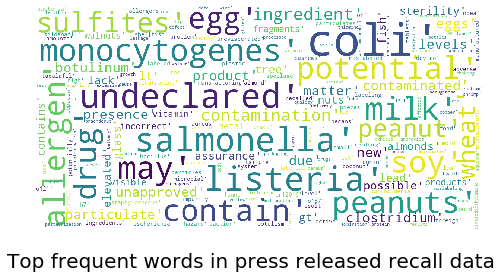

In [111]:
show_wordcloud(frequent_words_press_released[:200], title = "Top frequent words in press released recall data")

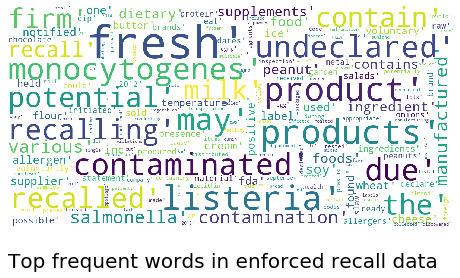

In [112]:
show_wordcloud(frequent_words_enforced[:200], title = "Top frequent words in enforced recall data")